In [ ]:
import pandas as pd
import kagglehub
# Load the dataset from your local file
try:
    path = kagglehub.dataset_download("jehanzaibbhatti/sales-data")
    data = pd.read_csv(path + '/sales_data.csv')

    print("Path to dataset files:", path)
except FileNotFoundError:
    print("Error: 'sales_data_sample.csv' not found. Please download it and place it in the correct directory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


# Display the first 5 rows and basic info
print("First 5 rows of the dataset:")
print(display(data.head()))
print("\nDataset Information:")
data.info()

Using Colab cache for faster access to the 'sales-data' dataset.
Path to dataset files: /kaggle/input/sales-data
First 5 rows of the dataset:


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


None

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost       

In [ ]:
# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# The dataset has missing values in ADDRESSLINE2, STATE, POSTALCODE, and TERRITORY.
# For this analysis, these columns are not critical, so we can leave them or drop them.
# We will focus on the core sales data. Let's drop columns we won't use.
columns_to_drop = ['ADDRESSLINE2', 'STATE', 'POSTALCODE', 'TERRITORY', 'PHONE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME']
existing_columns_to_drop = [col for col in columns_to_drop if col in data.columns]
data_cleaned = data.drop(columns=existing_columns_to_drop)

# Convert ORDERDATE to datetime format
# Assuming 'Date' column is the order date based on the previous cell's output
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])


# Create a 'SALES' column by multiplying quantity and price
# Assuming 'Order_Quantity' and 'Unit_Price' are the relevant columns based on the previous cell's output
data_cleaned['SALES'] = data_cleaned['Order_Quantity'] * data_cleaned['Unit_Price']

# Check for duplicates
print(f"\nNumber of duplicate rows: {data_cleaned.duplicated().sum()}")
data_cleaned.drop_duplicates(inplace=True)

print("\nData has been cleaned and a 'SALES' column has been added.")
print("Cleaned data sample:")
print(data_cleaned.head())


Missing values per column:
Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

Number of duplicate rows: 1000

Data has been cleaned and a 'SALES' column has been added.
Cleaned data sample:
        Date  Day     Month  Year  Customer_Age       Age_Group  \
0 2013-11-26   26  November  2013            19     Youth (<25)   
1 2015-11-26   26  November  2015            19     Youth (<25)   
2 2014-03-23   23     March  2014            49  Adults (35-64)   
3 2016-03-23   23     March  2016            49  Adults (35-64)   
4 2014-05-15   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State 

/tmp/ipython-input-1951652070.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data_cleaned.set_index('Date').resample('M')['SALES'].sum()


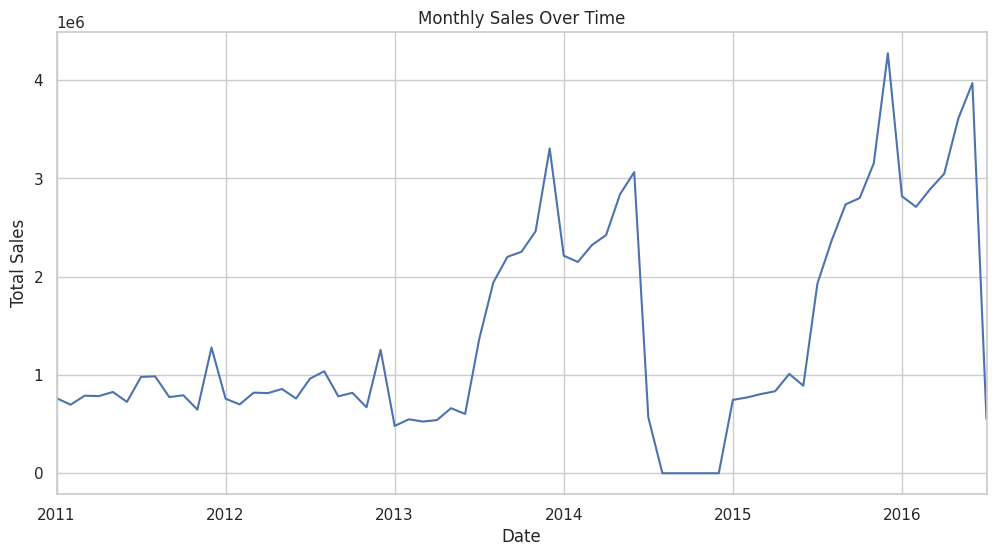

/tmp/ipython-input-1951652070.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


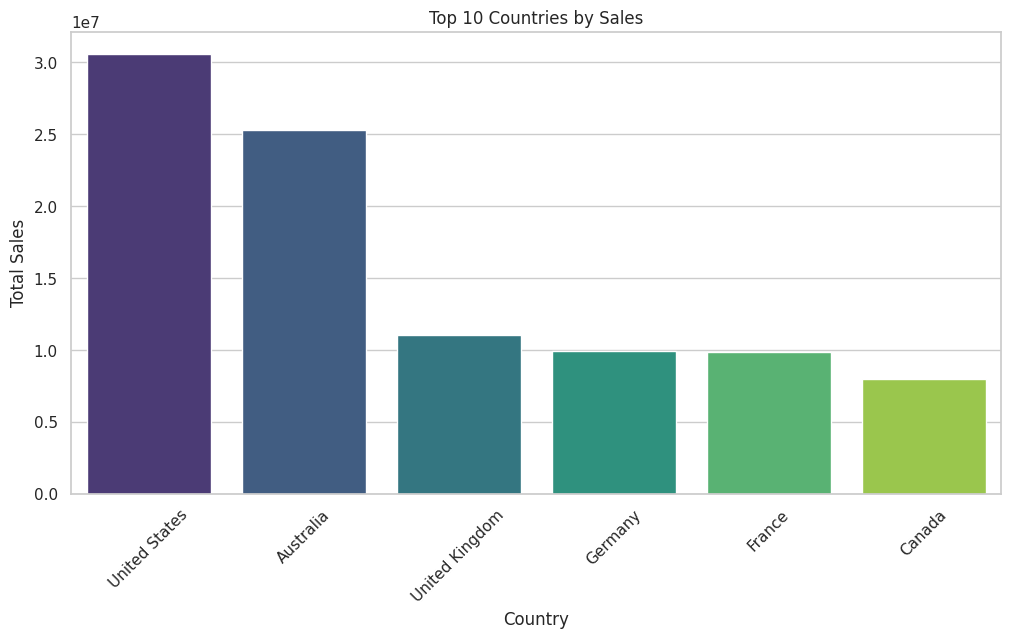

/tmp/ipython-input-1951652070.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products.index, x=top_products.values, palette='plasma', orient='h')


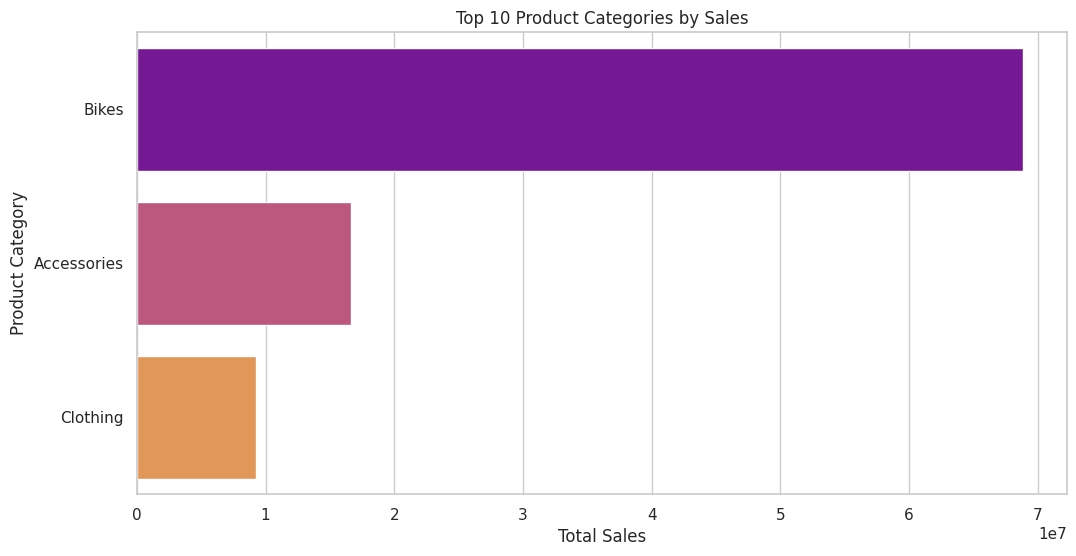

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# --- 1. Sales Trend Over Time ---
# Resample data by month to get a clearer trend
monthly_sales = data_cleaned.set_index('Date').resample('M')['SALES'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

# --- 2. Top 10 Countries by Sales ---
top_countries = data_cleaned.groupby('Country')['SALES'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# --- 3. Top 10 Product Lines by Sales ---
top_products = data_cleaned.groupby('Product_Category')['SALES'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_products.index, x=top_products.values, palette='plasma', orient='h')
plt.title('Top 10 Product Categories by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.show()

In [ ]:
print("Unique values in Recency:", rfm['Recency'].nunique())
print("Unique values in Frequency:", rfm['Frequency'].nunique())
print("Unique values in MonetaryValue:", rfm['MonetaryValue'].nunique())

Unique values in Recency: 28
Unique values in Frequency: 66
Unique values in MonetaryValue: 70


In [ ]:
# --- RFM Calculation ---
# Set a snapshot date for recency calculation (one day after the last order)
snapshot_date = data_cleaned['Date'].max() + pd.Timedelta(days=1)

# Calculate Recency, Frequency, and Monetary values for each customer
rfm = data_cleaned.groupby('Customer_Age').agg({
    'Date': lambda date: (snapshot_date - date.max()).days,
    'Year': 'count', # Using Year as a proxy for number of orders since ORDERNUMBER is not available
    'SALES': 'sum'
})

# Rename columns for clarity
rfm.rename(columns={'Date': 'Recency',
                    'Year': 'Frequency',
                    'SALES': 'MonetaryValue'}, inplace=True)

# --- RFM Scoring ---
# --- Safe RFM Scoring with unique bins ---

# Define label scales
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

# Function to safely generate bins and cut values
def safe_cut(series, labels):
    # Calculate quantiles
    quantiles = series.quantile([0, 0.25, 0.5, 0.75, 1]).unique()
    # Sort and keep unique edges
    bins = np.unique(quantiles)
    # Adjust labels if fewer bins
    if len(bins) - 1 < len(labels):
        labels = labels[:len(bins) - 1]
    return pd.cut(series, bins=bins, labels=labels, include_lowest=True)

# Apply safe cutting
rfm['R_Score'] = safe_cut(rfm['Recency'], r_labels)
rfm['F_Score'] = safe_cut(rfm['Frequency'], f_labels)
rfm['M_Score'] = safe_cut(rfm['MonetaryValue'], m_labels)

# Combine scores into RFM segment
rfm['RFM_Segment'] = (
    rfm['R_Score'].astype(str) +
    rfm['F_Score'].astype(str) +
    rfm['M_Score'].astype(str)
)

print("\n✅ RFM Analysis Complete. Sample of the RFM data:")
print(rfm.head())


# --- Save the final dataset for Power BI ---
# We will merge the RFM scores back to the main dataframe
final_data = pd.merge(data_cleaned, rfm, on='Customer_Age')
output_filename = 'sales_analysis_for_powerbi.csv'
final_data.to_csv(output_filename, index=False)

print(f"\nAnalysis complete! The final dataset has been saved as '{output_filename}'.")


✅ RFM Analysis Complete. Sample of the RFM data:
              Recency  Frequency  MonetaryValue R_Score F_Score M_Score  \
Customer_Age                                                              
17                  1       1289         815982       4       2       2   
18                  3       1746        1493441       4       3       3   
19                  1       1989        1562774       4       3       3   
20                  3       2000        1011011       4       3       2   
21                  1       2209        1405163       4       3       3   

             RFM_Segment  
Customer_Age              
17                   422  
18                   433  
19                   433  
20                   432  
21                   433  

Analysis complete! The final dataset has been saved as 'sales_analysis_for_powerbi.csv'.
